# Importing necessary packages

In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

from sklearn.model_selection import train_test_split

# Load dataset and explore

In [2]:
#    1. Number of times pregnant
#    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#    3. Diastolic blood pressure (mm Hg)
#    4. Triceps skin fold thickness (mm)
#    5. 2-Hour serum insulin (mu U/ml)
#    6. Body mass index (weight in kg/(height in m)^2)
#    7. Diabetes pedigree function
#    8. Age (years)
#    9. Class variable (0 or 1)

In [2]:
d_key= ['no_diabetes','diabetes']

In [3]:
cols = ['n_pregnancies','plasma_glucose','diastolic_bp', 'triceps_skin_thickness', '2_hr_insulin', 'bmi', 'diabetes_pedigree','age','diabetes']
df = pd.read_csv('pima-indians.csv', names=cols)
#display(df)

In [4]:
df_x = df.copy()
df_y = df_x.pop(item='diabetes')

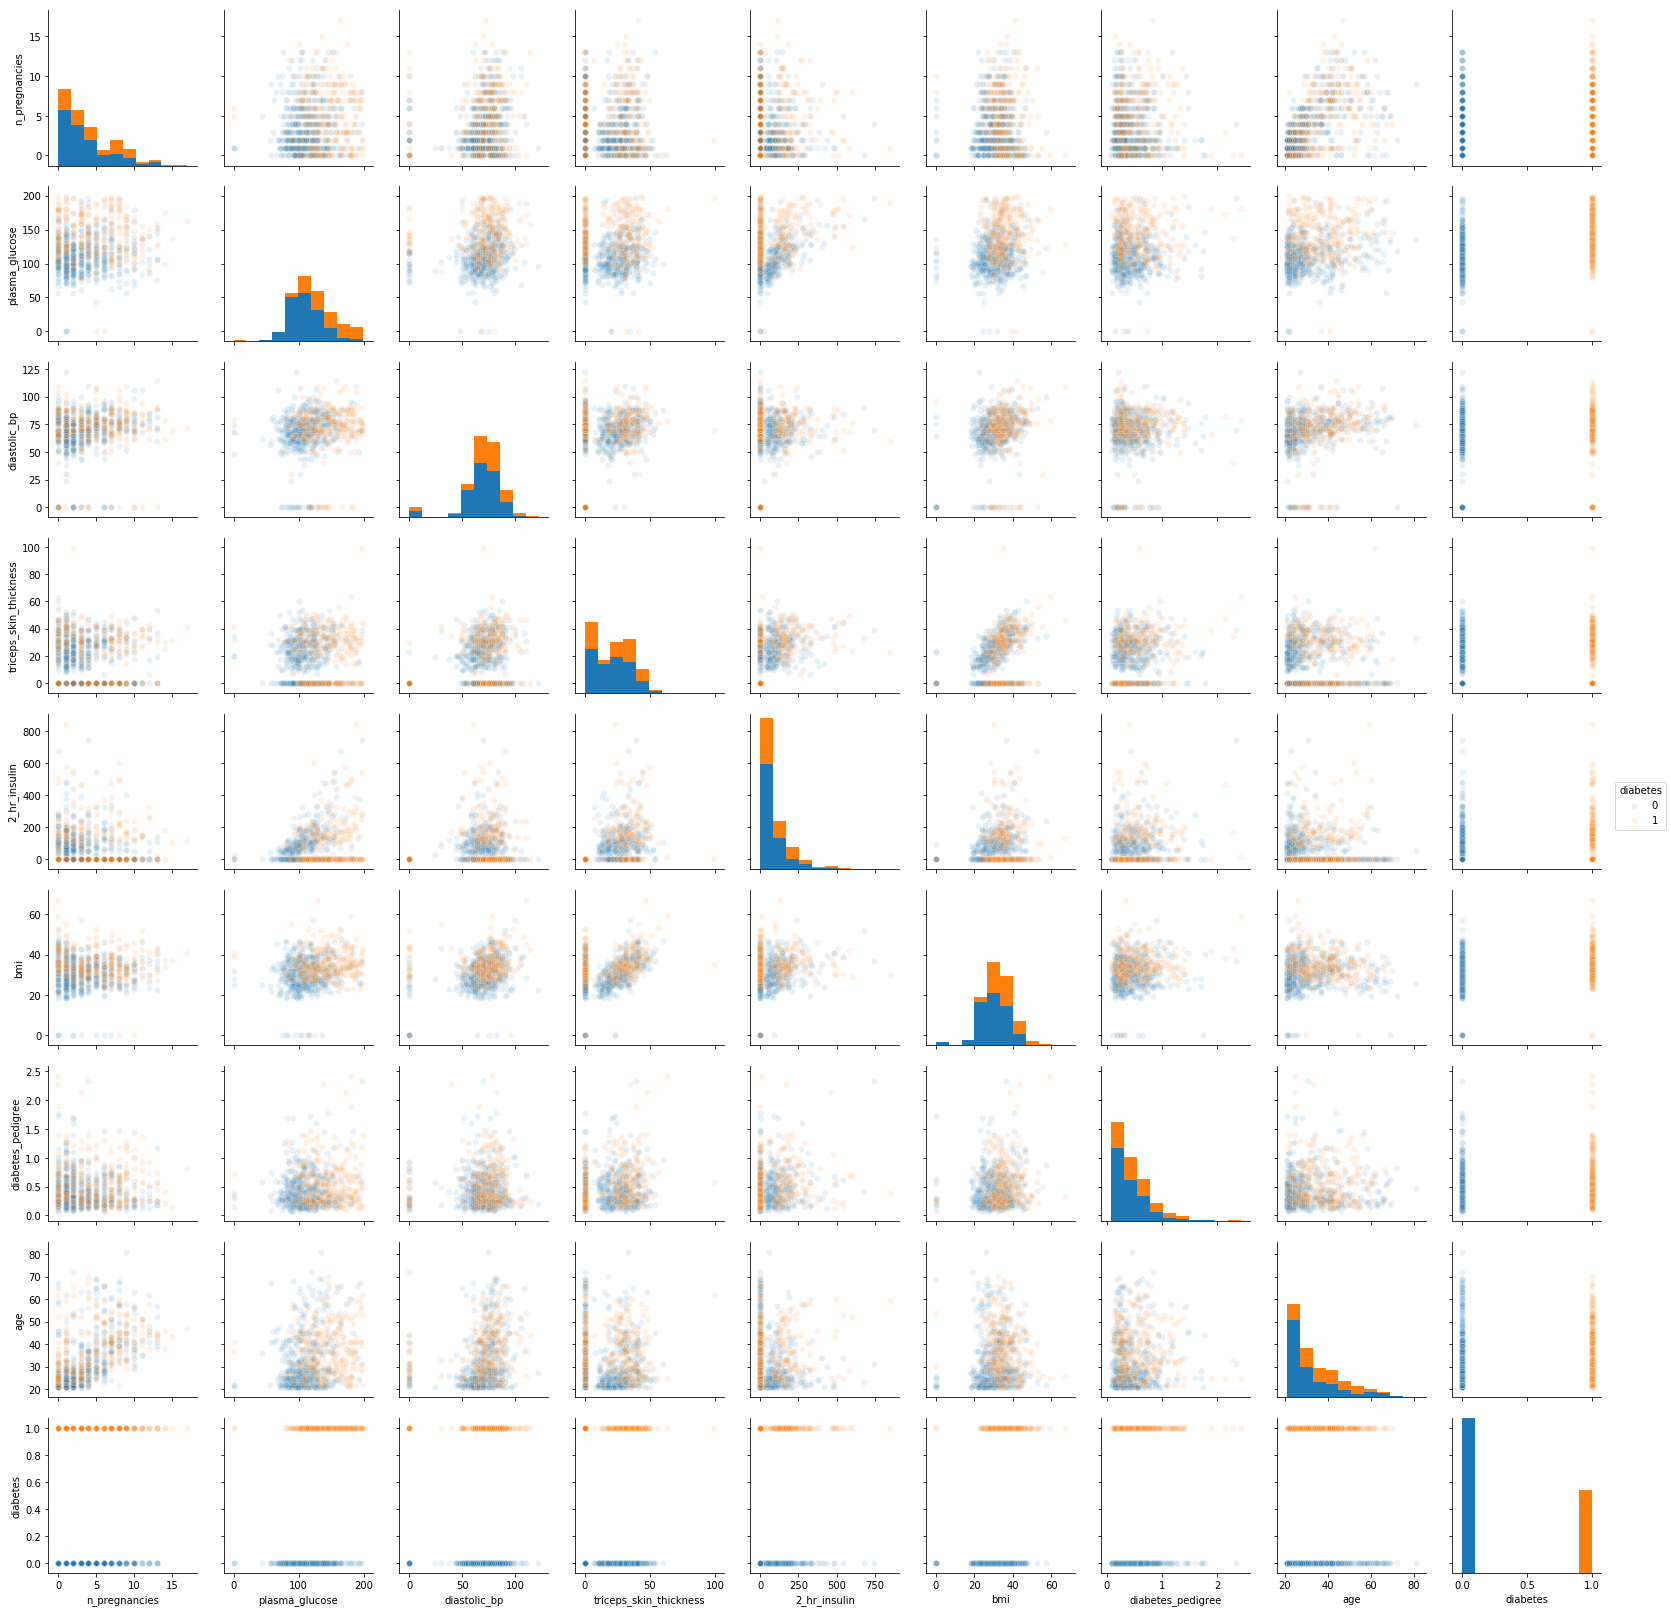

In [11]:
# df['diabetes'] = [d_key[v] for v in df['diabetes']]
sns.pairplot(df, hue='diabetes', plot_kws={'alpha':0.1})
plt.show()

In [7]:
df.describe()

,n_pregnancies,plasma_glucose,diastolic_bp,triceps_skin_thickness,2_hr_insulin,bmi,diabetes_pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

# Calculate probabilities using Bayes' Theorem

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

In [ ]:
P(y|x) = P(x|y)*P(y)/P(x)

# Calculate for each possible y
P(y)   = calculated using the distribution of class labels in training set
    y = 0 (no diabetes)
    y = 1 (diabetes)
    
P(x)   = calculated using a Gaussian model PDF
    Estimate mean and STD of each independent variable
    Calculate PDF value for a given observation.
    
P(x|y) = calculated using training dataset - 
    For each y value, calculate the independent variable X's distribution

In [65]:
# Calculate value of Gaussian probability density function at x
def calc_probability_density(x, mu, sigma):
    p = []
    for v in x:
        exp_term = math.exp( -0.5 * ( (v-mu)/sigma )**2 )
        coeff_term = 1/(sigma*math.sqrt(2*math.pi) )
        p.append(coeff_term*exp_term)
    return p

# Validate the function
# https://www.danielsoper.com/statcalc/calculator.aspx?id=54
# 3, 0, 1  = 0.00443185
# 1, 0, 1  = 0.24197072
#print(calc_probability_density([3, 1],0,1))

# Answer should be 0.0624896575937
#probability = calc_probability_density([71.5], 73, 6.2)
#print('Probability of belonging to this class: {0}'.format(probability[0]) )

In [66]:
# Calculate the conditional probability of a particular observation, given data
# Assumes a Gaussian probability distribution parameterized by mean and std.
def calc_probability(observations, stats):
    
    assert( (observations.keys() == stats.keys()).all() ) 
    
    probs = []
    for c in observations:
        p = calc_probability_density(observations[c].tolist(), mu=stats[c]['mean'], sigma=stats[c]['std'])
        probs.append(p)
    
    probs = pd.DataFrame(probs).transpose()
    probs.columns = observations.keys()
    return probs



# When x = 1.1, probabilities for each class should be: {n: 0.7820853879509118, y: 6.298736258150442e-05}
# stats = pd.DataFrame([[1,20],[0.5,5]], columns=['n','y'], index=['mean', 'std'])

# d_in = pd.DataFrame([1.1], columns=['n'])
# print(calc_probability(d_in,stats[['n']]))
# print('\n')

# d_in = pd.DataFrame([1.1], columns=['y'])
# print(calc_probability(d_in,stats[['y']]))
# print('\n')

# d_in = pd.DataFrame([[1.1, 1.1], [2.2,2.2],[3.3,3.3]], columns=['n','y'])
# print(calc_probability(d_in,stats) )
# print('\n')

In [ ]:
def calc_mean_std(x, ddof):
    tmp_mean = x.apply('mean')
    tmp_std = x.apply('std', ddof=ddof)
    tmp = pd.DataFrame([tmp_mean, tmp_std], index=['mean','std'])
    return tmp

#display(calc_mean_std(df_x[df_y == 0], 1))
#display(calc_mean_std(df_x[df_y == 0], 0))

In [101]:
# Testing probability functions

# Calculate the probability of
#    - A particular class
#    - A particular data observation
#    - A particular data observation given no diabetes
#    - A particular data observation given diabetes

# print('Prior probability, P(y)')
# priors = df['diabetes'].value_counts()/len(df['diabetes'])
# print('P(y=no diabetes) = %0.2f%%' % (priors[0]*100) )
# print('P(y=diabetes) = %0.2f%%' % (priors[1]*100) )
# print('\n')

# print('P(x) = probability of evidence x :')
# p_x = calc_probability(df_x.iloc[[0]], df_x.apply(['mean', 'std']))
# print(p_x.prod(axis=1))
# print('\n')

# print('P(x|y=no diabetes) = Likelihood of observing x, given no diabetes:')
# p_x_given_no_diabetes = calc_probability(df_x.iloc[[0]], df_x[df_y == 0].apply(['mean', 'std']) )
# print(p_x_given_no_diabetes.prod(axis=1))
# print('\n')

# print('P(x|y=diabetes) = Likelihood of observing x, given diabetes:')
# p_x_given_diabetes = calc_probability(df_x.iloc[[0]], df_x[df_y == 1].apply(['mean', 'std']) )
# print(p_x_given_diabetes.prod(axis=1))
# print('\n')

In [194]:
p_y = np.log(df['diabetes'].value_counts()/len(df['diabetes']))


p_x = np.log(calc_probability(df_x, calc_mean_std(df_x, 1))).sum(axis=1)
p_x_given_no_diabetes = np.log(calc_probability(df_x, calc_mean_std(df_x[df_y == 0],0))).sum(axis=1)
p_x_given_diabetes = np.log(calc_probability(df_x, calc_mean_std(df_x[df_y == 1],0))).sum(axis=1)



# p_x = np.log(calc_probability(df_x, df_x.apply(['mean', 'std']))).sum(axis=1)
# p_x_given_no_diabetes = np.log(calc_probability(df_x, df_x[df_y == 0].apply(['mean', 'std']))).sum(axis=1)
# p_x_given_diabetes = np.log(calc_probability(df_x, df_x[df_y == 1].apply(['mean', 'std']))).sum(axis=1)

# p_y = df['diabetes'].value_counts()/len(df['diabetes'])
# p_x = calc_probability(df_x, df_x.apply(['mean', 'std'])).prod(axis=1)
# p_x_given_no_diabetes = calc_probability(df_x, df_x[df_y == 0].apply(['mean', 'std'])).prod(axis=1)
# p_x_given_diabetes = calc_probability(df_x, df_x[df_y == 1].apply(['mean', 'std'])).prod(axis=1)

In [195]:
# Bayes theorem
# P(y|x) = P(x|y) * P(y) / P(x)

# posterior_n = p_y[0]*p_x_given_no_diabetes.div(p_x)
# posterior_y = p_y[1]*p_x_given_diabetes.div(p_x)

posterior_n = p_y[0]+p_x_given_no_diabetes#.add(-p_x)
posterior_y = p_y[1]+p_x_given_diabetes#.add(-p_x)

posterior = np.exp(pd.DataFrame([posterior_y, posterior_n])).transpose()
posterior.columns = ['diabetes','no_diabetes']
posterior = posterior.div(posterior.sum(axis=1), axis=0) 
print(posterior.head())
print('\n')

mdl_classification = posterior['diabetes'] > posterior['no_diabetes']

   diabetes  no_diabetes
0  0.671495     0.328505
1  0.019493     0.980507
2  0.801092     0.198908
3  0.013178     0.986822
4  0.999784     0.000216




In [196]:
print("Number of mislabeled points out of a total %d points : %d"
       % (df_x.shape[0],(df_y != mdl_classification).sum()))

correct_me = mdl_classification == df_y
print('Classification accuracy = %2.2f%%' % (100*sum(correct_me)/len(correct_me)))

Number of mislabeled points out of a total 768 points : 182
Classification accuracy = 76.30%


In [197]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred = gnb.fit(df_x, df_y).predict(df_x)
print("Number of mislabeled points out of a total %d points : %d"
       % (df_x.shape[0],(df_y != y_pred).sum()))

correct_skl = (df_y == y_pred)
print("Classification accuracy = %2.2f%%" % (100*sum(correct_skl)/len(correct_skl)) )

Number of mislabeled points out of a total 768 points : 182
Classification accuracy = 76.30%


In [198]:
posterior_skl = gnb.predict_proba(df_x)

In [199]:
# These are normalized to 1
print(posterior.head())
print(posterior.iloc[0,0])

print('\n')
print(posterior_skl[0:6])

   diabetes  no_diabetes
0  0.671495     0.328505
1  0.019493     0.980507
2  0.801092     0.198908
3  0.013178     0.986822
4  0.999784     0.000216
0.6714949276727039


[[3.28506058e-01 6.71493942e-01]
 [9.80505890e-01 1.94941099e-02]
 [1.98910960e-01 8.01089040e-01]
 [9.86821928e-01 1.31780719e-02]
 [2.16502287e-04 9.99783498e-01]
 [9.46344706e-01 5.36552941e-02]]


In [140]:
# Priors are the same
# Means are the same
# Stds are not the same - the difference is the STD estimator with n-1 or n

#stds
display(np.sqrt(gnb.sigma_[0]) )
display(df_x[df_y == 0].apply('std', ddof=0) )


# print(pd.DataFrame([posterior_y, posterior_n]).transpose().head())
# gnb._joint_log_likelihood(df_x)



array([ 3.01416809, 26.11504573, 18.04500366, 14.87505016, 98.76637459,
        7.68216217,  0.29880826, 11.65598187])

,n_pregnancies,plasma_glucose,diastolic_bp,triceps_skin_thickness,2_hr_insulin,bmi,diabetes_pedigree,age
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000


In [68]:
from mycode.bayes import bayes

mdl_classification = bayes(df_x, df_y)

print("Number of mislabeled points out of a total %d points : %d"
       % (df_x.shape[0],(df_y != mdl_classification).sum()))

correct_me = mdl_classification == df_y
print('Classification accuracy = %2.2f%%' % (100*sum(correct_me)/len(correct_me)))

> c:\users\alai\documents\python projects\chipy_spring2018\modelexamples\naivebayes\mycode\bayes.py(44)bayes()
-> p_x = np.log(calc_probability(df_x, calc_mean_std(df_x, 1))).sum(axis=1)
(Pdb) 
(Pdb) 
(Pdb) n
> c:\users\alai\documents\python projects\chipy_spring2018\modelexamples\naivebayes\mycode\bayes.py(45)bayes()
-> p_x_given_no_diabetes = np.log(calc_probability(df_x, calc_mean_std(df_x[df_y == 0],0))).sum(axis=1)
(Pdb) c
Number of mislabeled points out of a total 768 points : 182
Classification accuracy = 76.30%
